In [120]:
# Charity Smith
# Diving into Darkness: A Comparative Analysis of Batman Characters Through NLP and Sentiment Analysis
# Dialogue Review Analysis

In [121]:
# Importing necessary libraries
import pdfplumber
import re
from collections import defaultdict, Counter
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [122]:
# File paths for the two Batman movie scripts
pdf_files = {
    'Batman': '/Users/charitysmith/Documents/MSDS629_Practicum/Batman_SamHamm.pdf',
    'The Dark Knight': '/Users/charitysmith/Documents/MSDS629_Practicum/TheDarkKnight.pdf',
}

In [123]:
# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text()
    return text

In [124]:
# Extracting text from each PDF and storing it in a dictionary
scripts = {}
for movie, pdf_path in pdf_files.items():
    scripts[movie] = extract_text_from_pdf(pdf_path)

In [125]:
# Checking the extracted text (first 500 characters of each script)
for movie, script in scripts.items():
    print(f"--- {movie} ---")
    print(script[:500])
    print("\n")

--- Batman ---
BATMAN
Screenplay by
Sam Hamm
Based on the Character Created by
Bob Kane
FIRST DRAFT
October 20, 1986
FADE IN:
EXT. CITYSCAPE - NIGHT
The place is Gotham City. The time, 1987 -- once removed.
The city of Tomorrow: stark angles, creeping shadows,
dense, crowded, airless, a random tangle of steel and
concrete, self-generating, almost subterranean in its
aspect... as if hell had erupted through the sidewalks and
kept on growing. A dangling fat moon shines overhead, ready
to burst.
EXT. CATHEDRAL - 


--- The Dark Knight ---
THE DARK KNIGHT
by
Jonathan Nolan and Christopher Nolan
Story by
Christopher Nolan & David S. Goyer
Batman created by
Bob KaneT H E D A R K K N I G H T
BURNING. Massive flames. A dark shape emerges- The BAT
SYMBOL. Growing. Filling the screen with BLACKNESS.
CUT TO:
DAYLIGHT. Moving over the towers of downtown Gotham...
Closing in on an office building... On a large window...
Which SHATTERS to reveal-
INT. OFFICE, HIGH RISE -- DAY
A man in a CLOWN MASK h

In [126]:
# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove punctuation and special characters
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in additional_stop_words and len(token) > 3]  # Remove stopwords and short words
    return tokens

In [127]:
# Function to extract dialogues for each character and remove scene descriptions
def extract_dialogues(script):
    dialogues = defaultdict(list)
    lines = script.split('\n')
    character = None
    
    scene_description_patterns = [
        r'^INT\..*',
        r'^EXT\..*',
        r'^ANGLE.*',
        r'^ANOTHER ANGLE.*',
        r'^ANGLE ON.*',
        r'^FADE IN.*',
        r'^FADE OUT.*',
        r'^SERIES OF SHOTS.*'
    ]
    
    for line in lines:
        line = line.strip()
        if any(re.match(pattern, line) for pattern in scene_description_patterns):
            continue  # Skip lines that match scene description patterns
        if line.isupper() and len(line.split()) <= 3:  # Simple heuristic to identify character names
            character = line
        elif character and line:
            dialogues[character].append(line)
    return dialogues

In [128]:
# Extracting dialogues for each script
movie_dialogues = {}
for movie, script in scripts.items():
    movie_dialogues[movie] = extract_dialogues(script)

In [129]:
# Display extracted dialogues for verification
for movie, dialogues in movie_dialogues.items():
    print(f"--- {movie} ---")
    for character, lines in dialogues.items():
        print(f"{character}: {lines[:2]}")  # Display first 2 dialogues for each character
    print("\n")

--- Batman ---
BATMAN: ['Screenplay by', 'Sam Hamm']
FIRST DRAFT: ['October 20, 1986', 'The place is Gotham City. The time, 1987 -- once removed.']
MOM: ["For God's sake, Harold, can we", 'please just get a taxi??']
DAD: ["I'm trying to get a --", '(shouting)']
TAXI!!: ['Three cabs streak pass and disappear. MOM grimaces in', 'frustration as LITTLE JIMMY consults a subway map.']
JIMMY: ["We're going the wrong way.", 'Nearby, STREET TYPES are beginning to snicker. DAD surveys']
VOICE: ['Hey, mister. Gimme a dollar?', 'The VOICE belongs to a DERELICT -- nineteen or twenty,']
STREET PUNK: ["Do the kid a favor, lady. Don't", 'scream.']
NICK: ['(emptying the wallet)', 'All right. The Gold Card.']
EDDIE: ["Let's beat it, man. I don't like", 'being up here.']
DROP.: ['Standing at the edge of the roof, bathed in moonlight, is a', 'BLACK APPARITION. IT DOES NOT MOVE.']
ROOF, INTO MIDAIR.: ['Trembling, NICK crawls to the ledge and looks over...', 'finding ABSOLUTELY NO TRACE of the Batman.']
CUT

In [130]:
# Function to extract basic statistics for dialogues
def extract_basic_statistics(dialogues):
    statistics = {'Character': [], 'Word_Count': [], 'Sentence_Count': [], 'Average_Word_Length': []}
    for character, lines in dialogues.items():
        for line in lines:
            # Remove punctuation and split into words
            words = re.findall(r'\b\w+\b', line)
            word_count = len(words)
            sentence_count = len(re.split(r'[.!?]', line))
            avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
            
            statistics['Character'].append(character)
            statistics['Word_Count'].append(word_count)
            statistics['Sentence_Count'].append(sentence_count)
            statistics['Average_Word_Length'].append(avg_word_length)
    return pd.DataFrame(statistics)

In [136]:
# Extract statistics for each movie
movie_statistics = {}
for movie, dialogues in movie_dialogues.items():
    movie_statistics[movie] = extract_basic_statistics(dialogues)

# Combine all movie statistics into one DataFrame
all_statistics = pd.concat(movie_statistics.values(), keys=movie_statistics.keys(), names=['Movie', 'Index'])

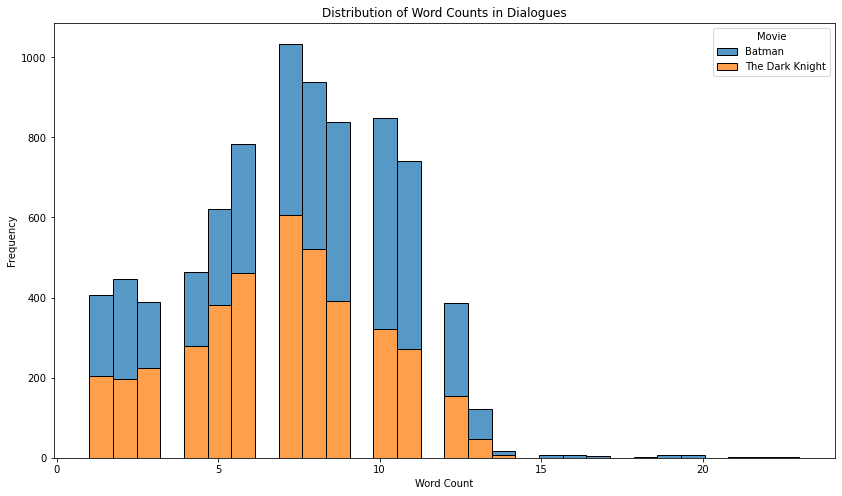

In [137]:
# Plot histograms for word counts
plt.figure(figsize=(14, 8))
sns.histplot(all_statistics, x='Word_Count', hue='Movie', multiple='stack', bins=30)
plt.title('Distribution of Word Counts in Dialogues')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

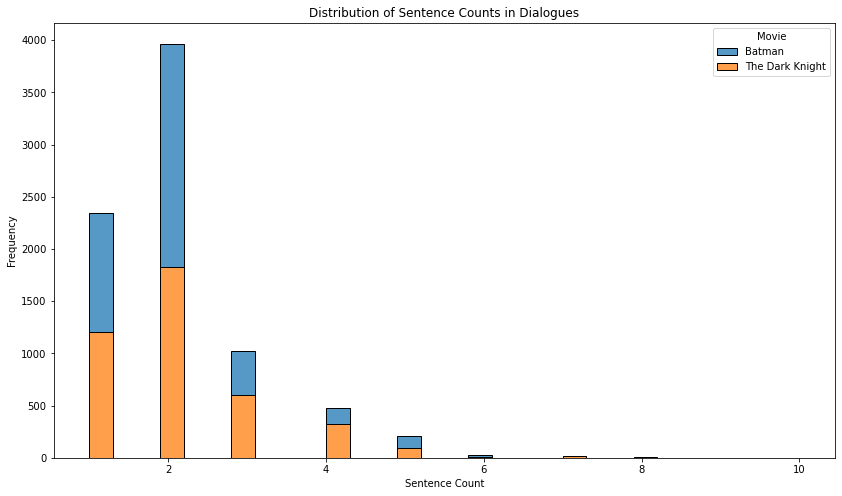

In [133]:
# Plot histograms for sentence counts
plt.figure(figsize=(14, 8))
sns.histplot(all_statistics, x='Sentence_Count', hue='Movie', multiple='stack', bins=30)
plt.title('Distribution of Sentence Counts in Dialogues')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

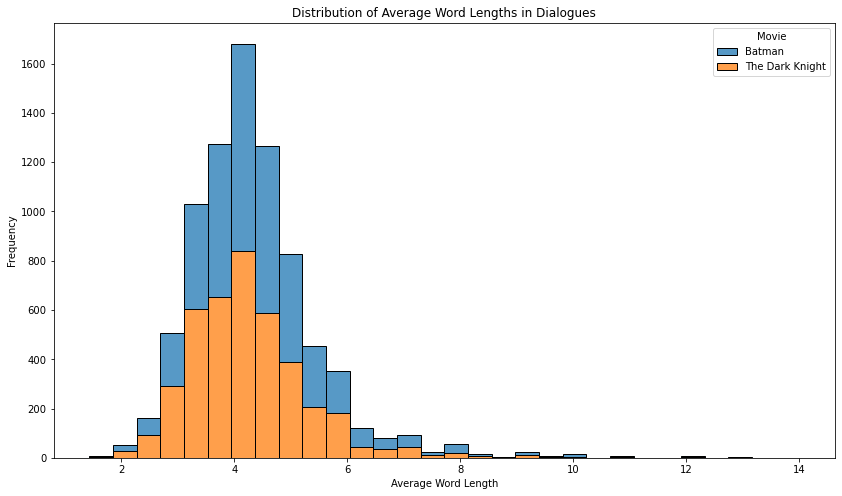

In [134]:
# Plot histograms for average word lengths
plt.figure(figsize=(14, 8))
sns.histplot(all_statistics, x='Average_Word_Length', hue='Movie', multiple='stack', bins=30)
plt.title('Distribution of Average Word Lengths in Dialogues')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

In [135]:
# Display basic statistics
print(all_statistics.groupby('Movie').agg({
    'Word_Count': ['mean', 'median', 'std'],
    'Sentence_Count': ['mean', 'median', 'std'],
    'Average_Word_Length': ['mean', 'median', 'std']
}))

                Word_Count                  Sentence_Count                   \
                      mean median       std           mean median       std   
Movie                                                                         
Batman            7.597853    8.0  3.398139       2.017474    2.0  0.982084   
The Dark Knight   6.826119    7.0  2.948766       2.113871    2.0  1.063573   

                Average_Word_Length                      
                               mean    median       std  
Movie                                                    
Batman                     4.409852  4.250000  1.150037  
The Dark Knight            4.243835  4.090909  1.103407  


In [138]:
# Number of unique characters
unique_characters = {movie: len(dialogues.keys()) for movie, dialogues in movie_dialogues.items()}
print("Number of Unique Characters in Each Movie:")
print(unique_characters)

# Most frequent characters
most_frequent_characters = {movie: Counter(dialogues.keys()).most_common(5) for movie, dialogues in movie_dialogues.items()}
print("Most Frequent Characters in Each Movie:")
print(most_frequent_characters)

Number of Unique Characters in Each Movie:
{'Batman': 149, 'The Dark Knight': 143}
Most Frequent Characters in Each Movie:
{'Batman': [('BATMAN', 1), ('FIRST DRAFT', 1), ('MOM', 1), ('DAD', 1), ('TAXI!!', 1)], 'The Dark Knight': [('THE DARK KNIGHT', 1), ('CUT TO:', 1), ('GRUMPY', 1), ('CHUCKLES', 1), ('HAPPY', 1)]}


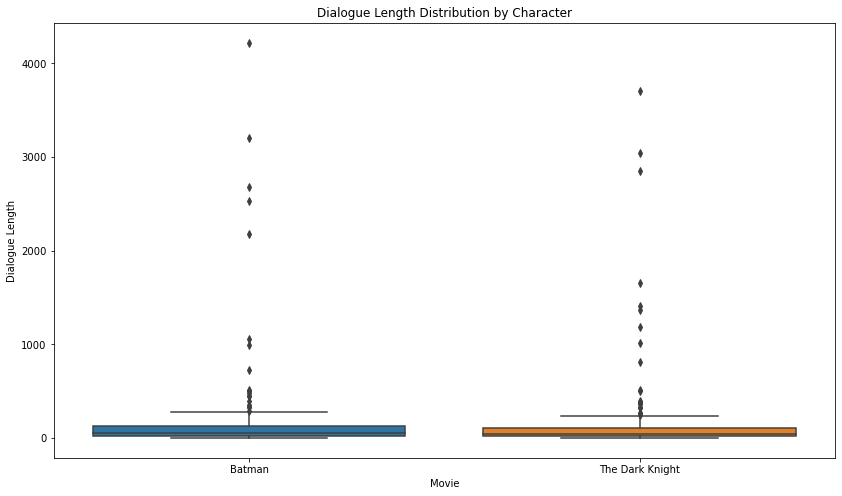

In [140]:
# Dialogue length distribution for each character
dialogue_length_distribution = defaultdict(list)
for movie, dialogues in movie_dialogues.items():
    for character, lines in dialogues.items():
        dialogue_length_distribution[movie].append((character, sum(len(re.findall(r'\b\w+\b', line)) for line in lines)))
        
# Convert to DataFrame for visualization
dialogue_length_df = pd.DataFrame([
    {'Movie': movie, 'Character': character, 'Dialogue_Length': length}
    for movie, char_lengths in dialogue_length_distribution.items()
    for character, length in char_lengths
])

# Plot dialogue length distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=dialogue_length_df, x='Movie', y='Dialogue_Length')
plt.title('Dialogue Length Distribution by Character')
plt.xlabel('Movie')
plt.ylabel('Dialogue Length')
plt.show()

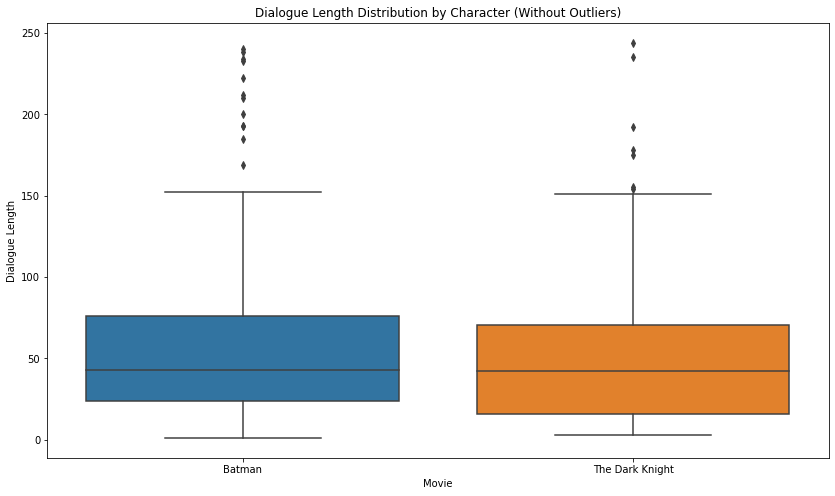

In [141]:
# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

dialogue_length_df = remove_outliers(dialogue_length_df, 'Dialogue_Length')

# Plot dialogue length distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=dialogue_length_df, x='Movie', y='Dialogue_Length')
plt.title('Dialogue Length Distribution by Character (Without Outliers)')
plt.xlabel('Movie')
plt.ylabel('Dialogue Length')
plt.show()

In [142]:
# Determine interactions
# Define main characters and villains
main_characters = {
    'Batman': ['BATMAN', 'BRUCE WAYNE', 'BRUCE', 'WAYNE', 'ALFRED', 'KNOX', 'VICKI', 'ECKHARDT', 'GORDON', 'JOKER', 'JACK', 'GRISSOM', 'MAYOR', 'DICK', 'ALICIA'],
    'The Dark Knight': ['BATMAN', 'BRUCE WAYNE', 'WAYNE', 'BRUCE', 'DENT', 'GORDON', 'ALFRED', 'RACHEL', 'MAYOR', 'LAU', 'THE JOKER']
}

villains = {
    'Batman': ['JACK', 'JOKER'],
    'The Dark Knight': ['THE JOKER']
}

In [143]:
# Count dialogues for Batman as Batman and Bruce Wayne
batman_dialogue_count = {
    'Batman': {'BATMAN': 0, 'BRUCE WAYNE': 0, 'BRUCE': 0, 'WAYNE': 0},
    'The Dark Knight': {'BATMAN': 0, 'WAYNE': 0, 'BRUCE WAYNE': 0, 'BRUCE': 0}
}

for movie, dialogues in movie_dialogues.items():
    for character, lines in dialogues.items():
        if character in batman_dialogue_count[movie]:
            batman_dialogue_count[movie][character] += len(lines)

In [144]:
# Combine counts for Bruce Wayne aliases
for movie, counts in batman_dialogue_count.items():
    counts['BRUCE WAYNE'] += counts.pop('BRUCE', 0) + counts.pop('WAYNE', 0)

In [145]:
# Display dialogue counts for verification
print("Dialogue Counts for Batman as Batman and Bruce Wayne:")
for movie, counts in batman_dialogue_count.items():
    print(f"{movie}: {counts}")

Dialogue Counts for Batman as Batman and Bruce Wayne:
Batman: {'BATMAN': 148, 'BRUCE WAYNE': 434}
The Dark Knight: {'BATMAN': 209, 'BRUCE WAYNE': 234}


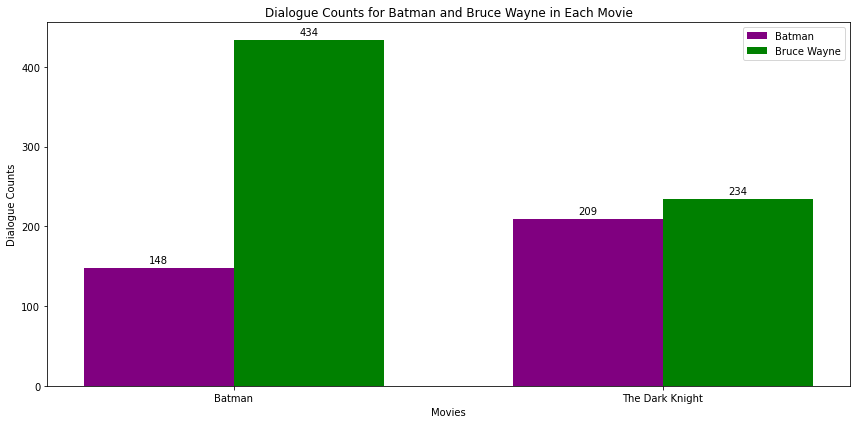

In [147]:
# Prepare data for plotting
movies = list(batman_dialogue_count.keys())
batman_counts = [counts['BATMAN'] for counts in batman_dialogue_count.values()]
bruce_counts = [counts['BRUCE WAYNE'] for counts in batman_dialogue_count.values()]

# Create a bar plot
x = np.arange(len(movies))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, batman_counts, width, label='Batman', color='purple')
bars2 = ax.bar(x + width/2, bruce_counts, width, label='Bruce Wayne', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Movies')
ax.set_ylabel('Dialogue Counts')
ax.set_title('Dialogue Counts for Batman and Bruce Wayne in Each Movie')
ax.set_xticks(x)
ax.set_xticklabels(movies)
ax.legend()

# Attach a text label above each bar in bars1 and bars2, displaying its height.
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()

In [148]:
# Function to combine character names while treating Batman and Bruce Wayne separately
def combine_character_names(character, movie):
    if character in ['BRUCE WAYNE', 'WAYNE', 'BRUCE']:
        return 'BRUCE WAYNE'
    elif character in ['BATMAN','THE BATMAN']:
        return 'BATMAN'
    elif character in ['JOKER', 'JACK', 'THE JOKER']:
        return 'JOKER'
    else:
        return character

In [149]:
# Count the number of times each character speaks and group similar characters
character_counts = defaultdict(Counter)
for movie, dialogues in movie_dialogues.items():
    for character, lines in dialogues.items():
        if character in main_characters[movie]:
            combined_character = combine_character_names(character, movie)
            character_counts[combined_character][movie] += len(lines)


In [150]:
# Display character counts for verification
for movie, counts in character_counts.items():
    print(f"--- {movie} ---")
    for character, count in counts.most_common():
        print(f"{character}: {count} lines")
    print("\n")

--- BATMAN ---
The Dark Knight: 209 lines
Batman: 148 lines


--- ALICIA ---
Batman: 31 lines


--- JOKER ---
Batman: 627 lines
The Dark Knight: 540 lines


--- ECKHARDT ---
Batman: 43 lines


--- KNOX ---
Batman: 389 lines


--- VICKI ---
Batman: 349 lines


--- GRISSOM ---
Batman: 67 lines


--- ALFRED ---
The Dark Knight: 185 lines
Batman: 20 lines


--- GORDON ---
The Dark Knight: 421 lines
Batman: 117 lines


--- BRUCE WAYNE ---
Batman: 434 lines
The Dark Knight: 234 lines


--- MAYOR ---
The Dark Knight: 40 lines
Batman: 11 lines


--- DICK ---
Batman: 33 lines


--- DENT ---
The Dark Knight: 469 lines


--- RACHEL ---
The Dark Knight: 166 lines


--- LAU ---
The Dark Knight: 120 lines




In [151]:
# Create a DataFrame from the character counts
df = pd.DataFrame(character_counts).fillna(0).T

# Ensure the DataFrame has columns for each movie
for movie in pdf_files.keys():
    if movie not in df.columns:
        df[movie] = 0


# Ensure correct order and select top 10 characters
df = df[["Batman", "The Dark Knight"]]  # Ensure correct order
df = df.loc[df.sum(axis=1).sort_values(ascending=False).index[:10]]  # Top 10 characters

# Check the DataFrame structure
print(df)

             Batman  The Dark Knight
JOKER         627.0            540.0
BRUCE WAYNE   434.0            234.0
GORDON        117.0            421.0
DENT            0.0            469.0
KNOX          389.0              0.0
BATMAN        148.0            209.0
VICKI         349.0              0.0
ALFRED         20.0            185.0
RACHEL          0.0            166.0
LAU             0.0            120.0


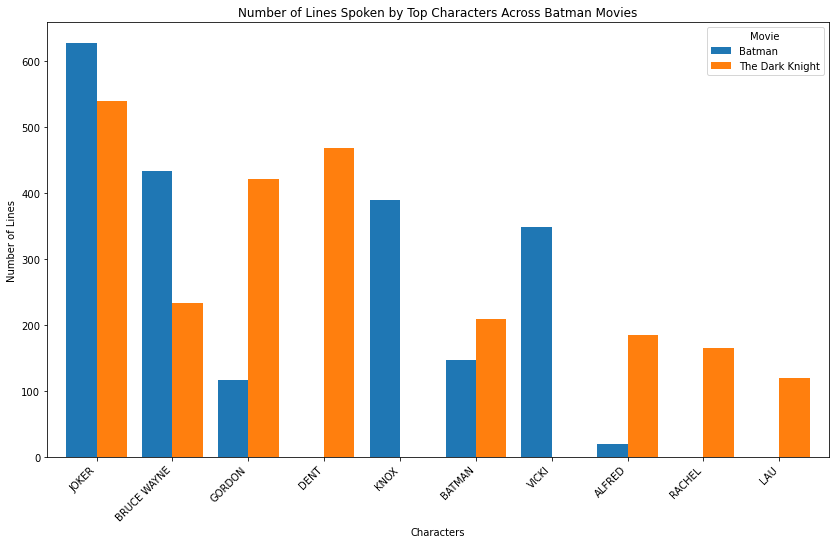

In [152]:
# Plot the combined visual
df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Number of Lines Spoken by Top Characters Across Batman Movies')
plt.xlabel('Characters')
plt.ylabel('Number of Lines')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Movie')
plt.show()

In [153]:
# Update the visual above by combining Bruce Wayne and Batman
# Function to combine character names while treating Batman and Bruce Wayne as one
def combine_character_names(character):
    if character in ['BATMAN', 'BRUCE WAYNE', 'WAYNE', 'BRUCE']:
        return 'BATMAN/BRUCE WAYNE'
    elif character in ['JOKER', 'JACK', 'THE JOKER']:
        return 'JOKER'
    else:
        return character

# Count the number of times each character speaks and group similar characters
character_counts = defaultdict(Counter)
for movie, dialogues in movie_dialogues.items():
    for character, lines in dialogues.items():
        if character in main_characters[movie]:
            combined_character = combine_character_names(character)
            character_counts[combined_character][movie] += len(lines)

                    Batman  The Dark Knight
JOKER                627.0            540.0
BATMAN/BRUCE WAYNE   582.0            443.0
GORDON               117.0            421.0
DENT                   0.0            469.0
KNOX                 389.0              0.0
VICKI                349.0              0.0
ALFRED                20.0            185.0
RACHEL                 0.0            166.0
LAU                    0.0            120.0
GRISSOM               67.0              0.0


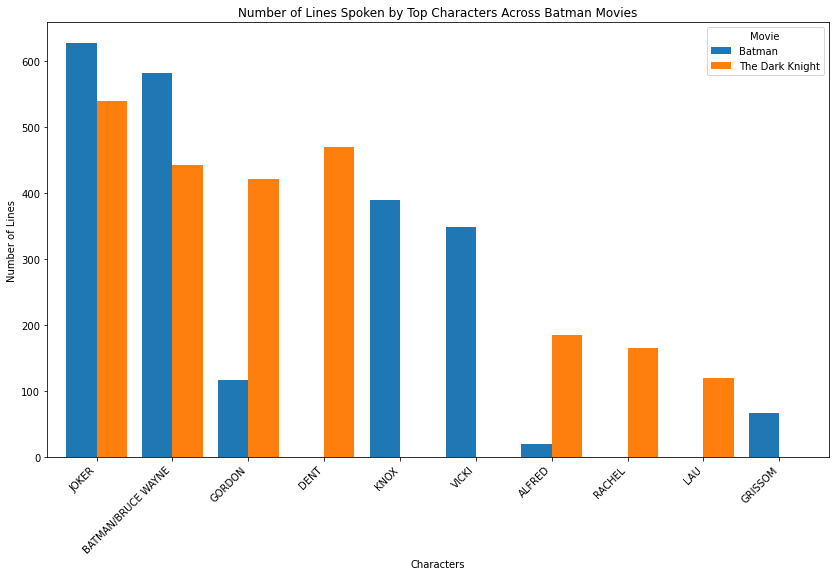

In [154]:
# Create a DataFrame from the character counts
df = pd.DataFrame(character_counts).fillna(0).T

# Ensure the DataFrame has columns for each movie
for movie in pdf_files.keys():
    if movie not in df.columns:
        df[movie] = 0

# Ensure correct order and select top 10 characters
df = df[["Batman", "The Dark Knight"]]  # Ensure correct order
df = df.loc[df.sum(axis=1).sort_values(ascending=False).index[:10]]  # Top 10 characters

# Check the DataFrame structure
print(df)

# Plot the combined visual
df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Number of Lines Spoken by Top Characters Across Batman Movies')
plt.xlabel('Characters')
plt.ylabel('Number of Lines')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Movie')
plt.show()

In [155]:
# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
additional_stop_words = {'cont', 'back', 'know', 'looks', 'is', 'are', 'was', 'were', 'has', 'have', 'had', 'does', 'do', 'did', 'get', 'go', 'goes', 'went', 'see', 'saw', 'seen', 'turns','first','dont','something','keep','take','youre', 'look','like','quite','tell','maroni','need','going','well'}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charitysmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charitysmith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [156]:
# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in additional_stop_words and len(token) > 3]  # Remove stopwords, additional stopwords, and short words
    return tokens

In [157]:
# Function to exclude the character's name from their own word count
def exclude_character_name(tokens, character):
    character_name = character.lower()
    return [token for token in tokens if token != character_name]

In [158]:
# Characters to analyze
characters_to_analyze = {
    'Batman': ['BATMAN', 'BRUCE', 'JOKER', 'ALFRED', 'VICKI', 'JACK', 'GORDON'],
    'The Dark Knight': ['BATMAN', 'WAYNE', 'THE JOKER', 'ALFRED', 'DENT', 'RACHEL','GORDON']
}

In [159]:
# Count word frequencies for each character
word_counts = {movie: defaultdict(Counter) for movie in characters_to_analyze}

for movie, characters in characters_to_analyze.items():
    for character in characters:
        if character in movie_dialogues[movie]:
            text = ' '.join(movie_dialogues[movie][character])
            tokens = preprocess_text(text)
            filtered_tokens = exclude_character_name(tokens, character)
            word_counts[movie][character].update(filtered_tokens)

In [160]:
# Display word counts for verification
for movie, counts in word_counts.items():
    print(f"--- {movie} ---")
    for character, count in counts.items():
        print(f"{character}: {count.most_common(5)}")

--- Batman ---
BATMAN: [('vicki', 12), ('joker', 6), ('face', 5), ('photos', 4), ('reaches', 4)]
BRUCE: [('vicki', 35), ('alfred', 14), ('joker', 9), ('long', 8), ('hand', 7)]
JOKER: [('vicki', 20), ('bruce', 18), ('batman', 15), ('face', 13), ('behind', 11)]
ALFRED: [('joker', 2), ('wayne', 2), ('pool', 2), ('thirty', 1), ('feet', 1)]
VICKI: [('bruce', 29), ('knox', 11), ('smiles', 8), ('face', 6), ('batman', 6)]
JACK: [('eckhardt', 7), ('grissom', 4), ('chair', 3), ('face', 3), ('alicia', 2)]
GORDON: [('jack', 15), ('hood', 15), ('batman', 14), ('floor', 10), ('wall', 9)]
--- The Dark Knight ---
BATMAN: [('joker', 17), ('gordon', 15), ('dent', 13), ('jokers', 5), ('dents', 5)]
WAYNE: [('alfred', 17), ('rachel', 14), ('dent', 12), ('harvey', 9), ('batman', 7)]
THE JOKER: [('joker', 58), ('batman', 36), ('jokers', 14), ('pulls', 13), ('gordon', 13)]
ALFRED: [('wayne', 22), ('dent', 7), ('rachel', 6), ('master', 5), ('face', 4)]
DENT: [('rachel', 30), ('gordon', 26), ('batman', 19), ('w

In [161]:
# Define color mapping for characters
character_colors = {
    'BATMAN': 'blue',
    'BRUCE': 'brown',
    'WAYNE': 'brown',
    'JOKER': 'red',
    'THE JOKER': 'red',
    'ALFRED': 'green',
    'VICKI': 'purple',
    'DENT': 'orange',
    'RACHEL': 'pink',
    'GORDON': 'cyan'
}

In [162]:
# Create horizontal bar plots for each character's top five words
def plot_horizontal_bar(top_words, title):
    fig, axes = plt.subplots(len(top_words), 1, figsize=(10, 15), sharex=True)
    fig.suptitle(title)
    
    for ax, (character, counts) in zip(axes, top_words.items()):
        if counts:
            words, freqs = zip(*counts.most_common(5))
            bars = ax.barh(words, freqs, color=character_colors.get(character, 'grey'))
            for bar, freq in zip(bars, freqs):
                ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{freq}', va='center', ha='left')
        else:
            ax.barh([], [])
        ax.set_title(character)
        ax.set_xlabel('Frequency')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [163]:
# Data for "Batman" and "The Dark Knight"
batman_top_words = {character: word_counts['Batman'][character] for character in characters_to_analyze['Batman']}
dark_knight_top_words = {character: word_counts['The Dark Knight'][character] for character in characters_to_analyze['The Dark Knight']}

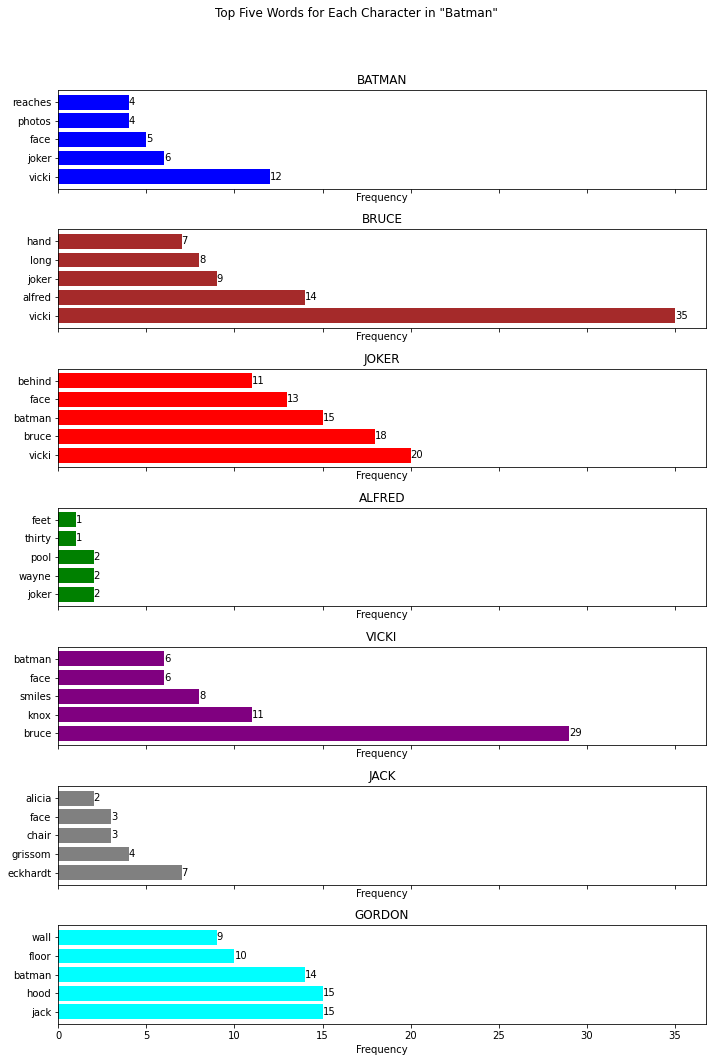

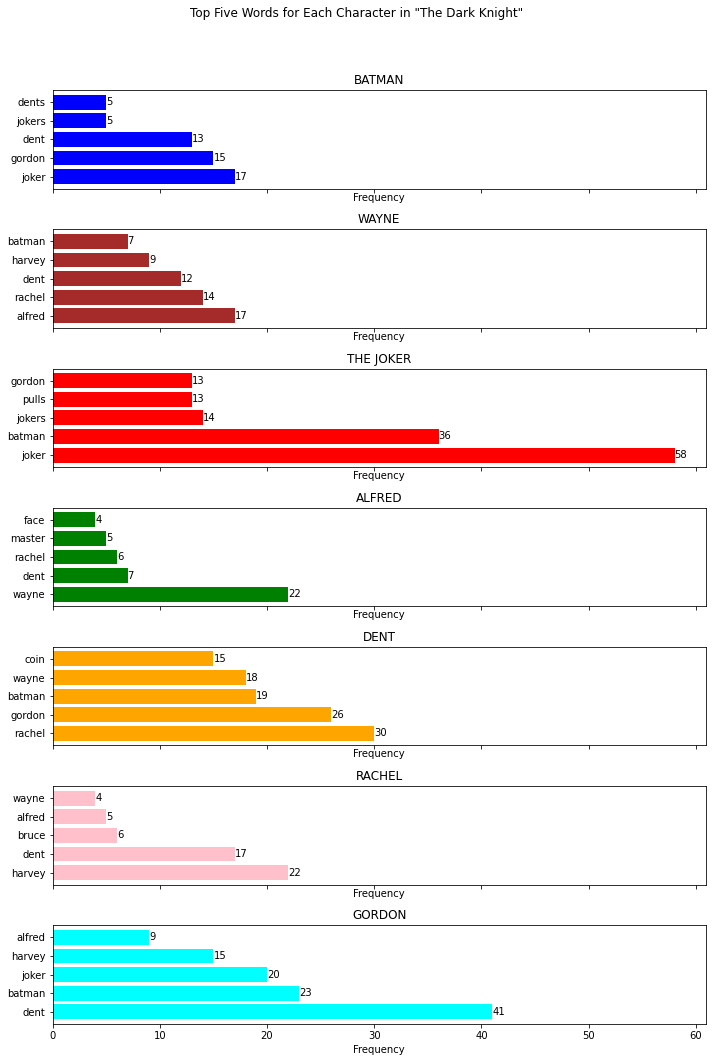

In [164]:
# Plotting horizontal bar charts
plot_horizontal_bar(batman_top_words, 'Top Five Words for Each Character in "Batman"')
plot_horizontal_bar(dark_knight_top_words, 'Top Five Words for Each Character in "The Dark Knight"')

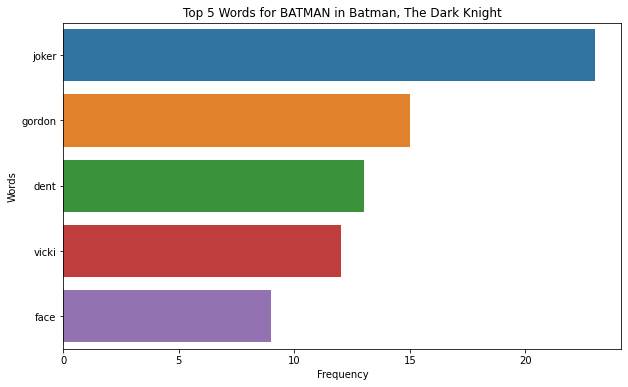

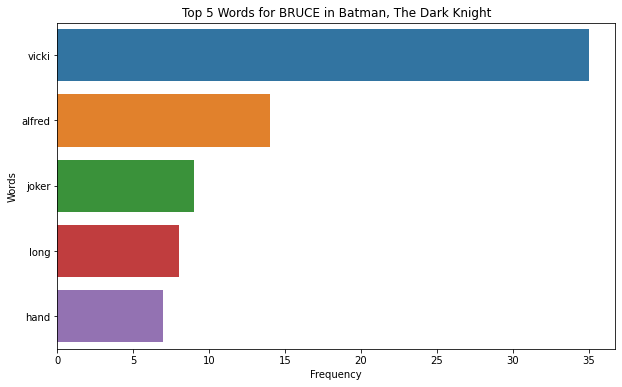

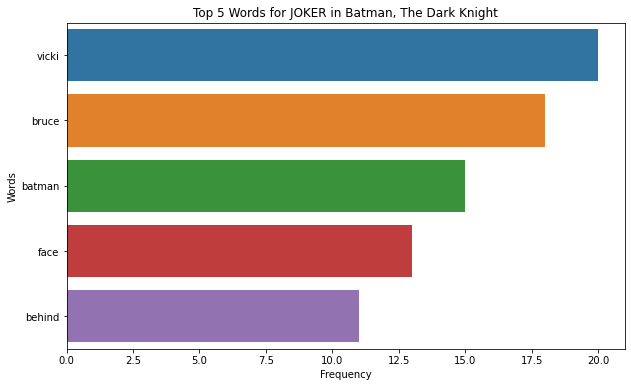

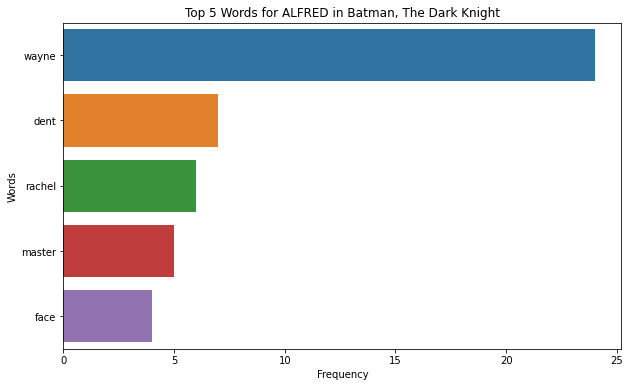

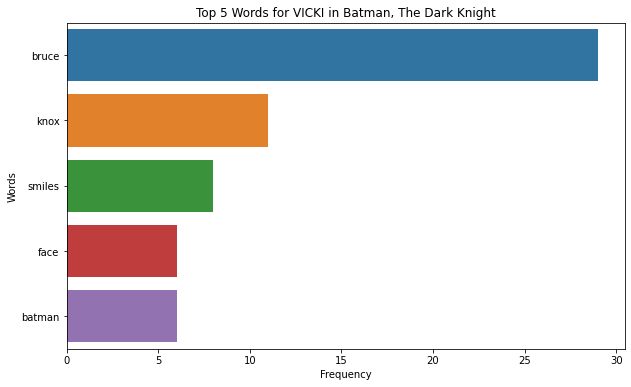

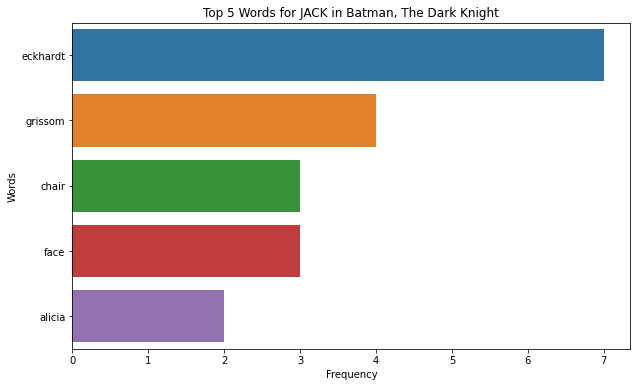

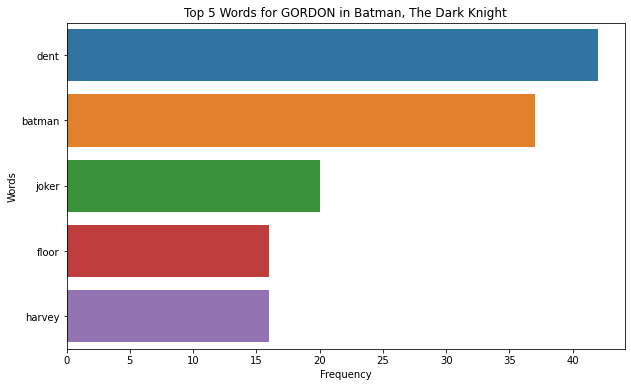

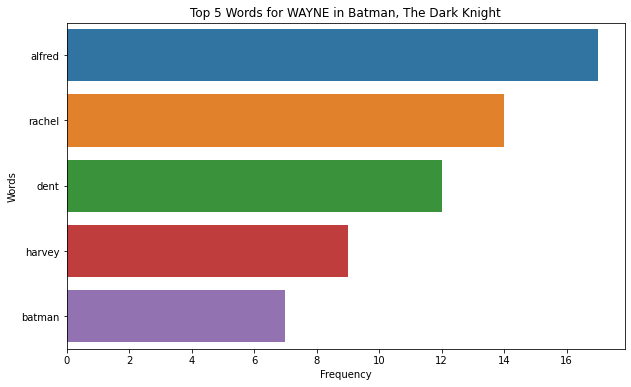

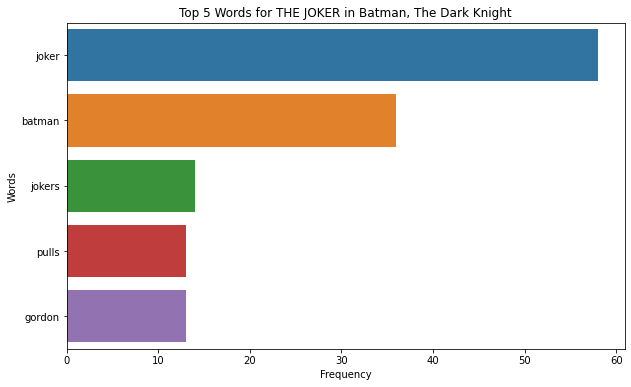

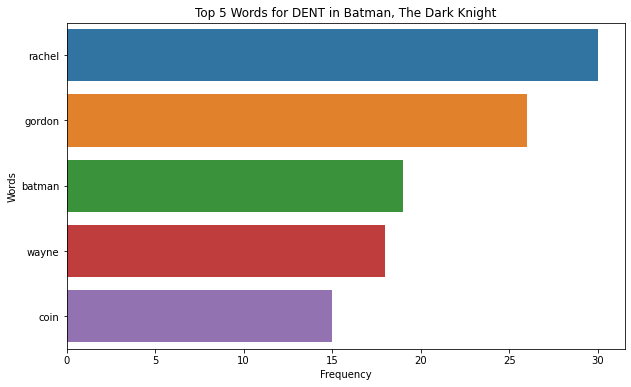

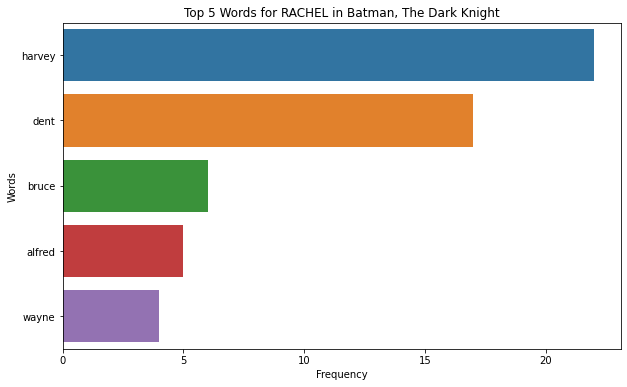

In [165]:
# Create a combined plot for both movies
def plot_combined_top_words(word_counts, movie_titles):
    combined_counts = defaultdict(Counter)
    
    for movie in movie_titles:
        for character, counts in word_counts[movie].items():
            combined_counts[character].update(counts)
    
    for character, counts in combined_counts.items():
        top_words = counts.most_common(5)
        words, frequencies = zip(*top_words)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(frequencies), y=list(words))
        plt.title(f'Top 5 Words for {character} in {", ".join(movie_titles)}')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.show()

plot_combined_top_words(word_counts, ['Batman', 'The Dark Knight'])

In [166]:
# Function to calculate sentiment for each dialogue
def calculate_sentiment(dialogues):
    sentiment_scores = {}
    for character, lines in dialogues.items():
        sentiment_scores[character] = []
        for line in lines:
            analysis = TextBlob(line)
            sentiment_scores[character].append(analysis.sentiment.polarity)
    return sentiment_scores

# Calculate sentiment for each character in each movie
movie_sentiments = {}
for movie in movie_dialogues:
    movie_sentiments[movie] = calculate_sentiment(movie_dialogues[movie])

In [167]:
# Function to calculate average sentiment scores
def average_sentiment(sentiment_scores):
    average_scores = {}
    for character, scores in sentiment_scores.items():
        if scores:  # Avoid division by zero
            average_scores[character] = sum(scores) / len(scores)
        else:
            average_scores[character] = 0
    return average_scores

In [168]:
# Prepare data for visualization (main characters only)
def prepare_sentiment_data(average_sentiments, characters_to_include):
    data = []
    for movie, sentiments in average_sentiments.items():
        for character, score in sentiments.items():
            if character in characters_to_include:
                data.append({'Movie': movie, 'Character': character, 'Sentiment': score})
    return pd.DataFrame(data)

In [169]:
# Function to combine character results
def combine_character_results(average_sentiments, combined_characters):
    combined_sentiments = {}
    for movie, sentiments in average_sentiments.items():
        combined_sentiments[movie] = {}
        for character, score in sentiments.items():
            combined_character = combined_characters.get(character, character)
            if combined_character in combined_sentiments[movie]:
                combined_sentiments[movie][combined_character].append(score)
            else:
                combined_sentiments[movie][combined_character] = [score]
        # Average the combined scores
        for character in combined_sentiments[movie]:
            combined_sentiments[movie][character] = sum(combined_sentiments[movie][character]) / len(combined_sentiments[movie][character])
    return combined_sentiments

In [170]:
# Characters to combine
combined_characters = {
    'THE JOKER': 'JOKER',
    'WAYNE': 'BRUCE WAYNE',
    'BRUCE': 'BRUCE WAYNE'
}

In [171]:
# Calculate average sentiment for each character in each movie
average_movie_sentiments = {movie: average_sentiment(sentiments) for movie, sentiments in movie_sentiments.items()}

# Combine sentiment results
combined_movie_sentiments = combine_character_results(average_movie_sentiments, combined_characters)

In [172]:
# Prepare data for visualization (main characters only)
main_characters = ['BATMAN', 'BRUCE WAYNE', 'JOKER', 'JACK']

def prepare_sentiment_data(average_sentiments, characters_to_include):
    data = []
    for movie, sentiments in average_sentiments.items():
        for character, score in sentiments.items():
            if character in characters_to_include:
                data.append({'Movie': movie, 'Character': character, 'Sentiment': score})
    return pd.DataFrame(data)

sentiment_data = prepare_sentiment_data(combined_movie_sentiments, main_characters)

In [173]:
# Print sentiment scores for each main character
print("TextBlob Sentiment Scores for Main Characters:")
for index, row in sentiment_data.iterrows():
    print(f"Movie: {row['Movie']}, Character: {row['Character']}, Sentiment Score: {row['Sentiment']}")

TextBlob Sentiment Scores for Main Characters:
Movie: Batman, Character: BATMAN, Sentiment Score: 0.018861808236808237
Movie: Batman, Character: JACK, Sentiment Score: 0.029191066066066064
Movie: Batman, Character: BRUCE WAYNE, Sentiment Score: 0.17031196189850037
Movie: Batman, Character: JOKER, Sentiment Score: 0.013576064344034498
Movie: The Dark Knight, Character: JOKER, Sentiment Score: 0.004720692373470152
Movie: The Dark Knight, Character: BATMAN, Sentiment Score: 0.024136765237243705
Movie: The Dark Knight, Character: BRUCE WAYNE, Sentiment Score: 0.02952899723733057


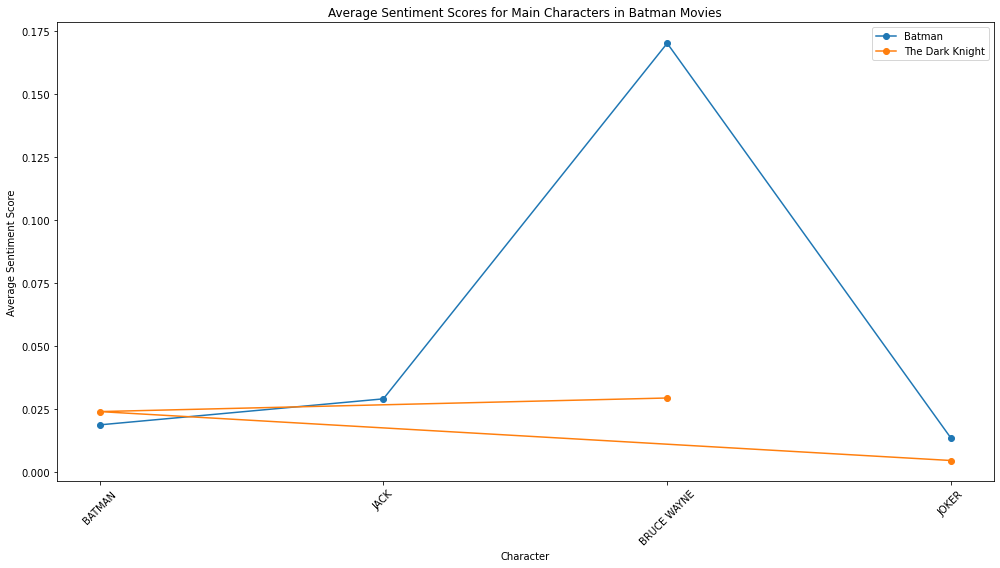

In [174]:
# Plotting sentiment scores for each character in each movie (Line Plot)
plt.figure(figsize=(14, 8))
for movie in sentiment_data['Movie'].unique():
    subset = sentiment_data[sentiment_data['Movie'] == movie]
    plt.plot(subset['Character'], subset['Sentiment'], marker='o', label=movie)

plt.title('Average Sentiment Scores for Main Characters in Batman Movies')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [175]:
# Create a pivot table for side-by-side bars
pivot_data = sentiment_data.pivot(index='Character', columns='Movie', values='Sentiment').fillna(0)

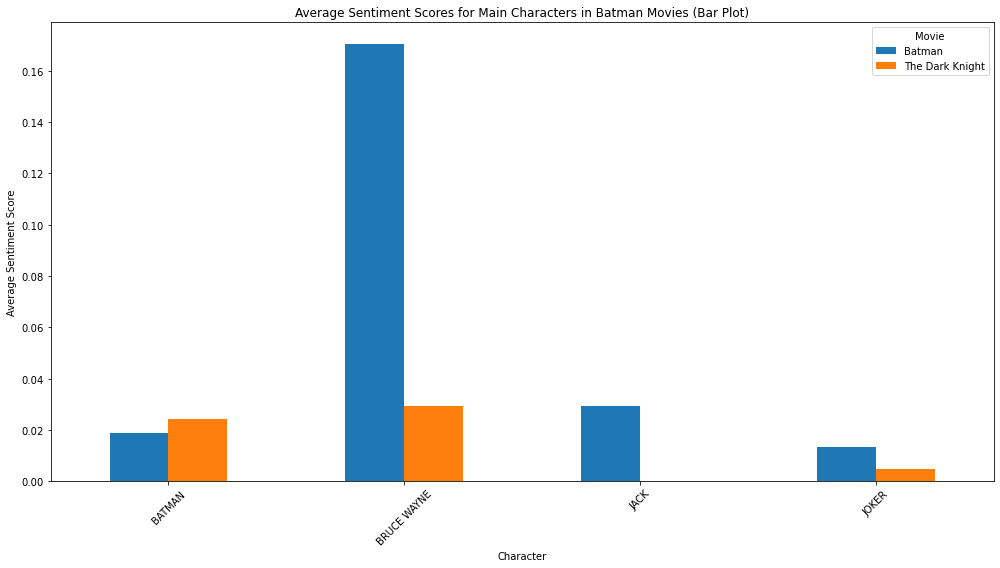

In [176]:
# Plotting sentiment scores for each character in each movie (Bar Plot)
pivot_data.plot(kind='bar', figsize=(14, 8))
plt.title('Average Sentiment Scores for Main Characters in Batman Movies (Bar Plot)')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Movie')
plt.tight_layout()
plt.show()

In [177]:
# Supporting characters to include
supporting_characters = {
    'Batman': ['GORDON', 'ALFRED', 'VICKI'],
    'The Dark Knight': ['DENT', 'RACHEL', 'ALFRED', 'GORDON']
}

In [178]:
# Combine sentiment results
combined_movie_sentiments = combine_character_results(average_movie_sentiments, combined_characters)

In [179]:
# Prepare data for visualization (supporting characters only)
def prepare_sentiment_data(average_sentiments, characters_to_include):
    data = []
    for movie, sentiments in average_sentiments.items():
        for character, score in sentiments.items():
            if character in characters_to_include:
                data.append({'Movie': movie, 'Character': character, 'Sentiment': score})
    return pd.DataFrame(data)

In [180]:
# Combine lists of supporting characters for easier processing
all_supporting_characters = set(supporting_characters['Batman'] + supporting_characters['The Dark Knight'])
sentiment_data = prepare_sentiment_data(combined_movie_sentiments, all_supporting_characters)

In [181]:
# Print sentiment scores for each supporting character
print("Sentiment Scores for Supporting Characters:")
for index, row in sentiment_data.iterrows():
    print(f"Movie: {row['Movie']}, Character: {row['Character']}, Sentiment Score: {row['Sentiment']}")

Sentiment Scores for Supporting Characters:
Movie: Batman, Character: DENT, Sentiment Score: 0.03418081037128656
Movie: Batman, Character: VICKI, Sentiment Score: 0.008522840976279382
Movie: Batman, Character: ALFRED, Sentiment Score: -0.07142857142857142
Movie: Batman, Character: GORDON, Sentiment Score: -0.007863587030253699
Movie: The Dark Knight, Character: GORDON, Sentiment Score: -0.006521616744300833
Movie: The Dark Knight, Character: ALFRED, Sentiment Score: 0.024519246519246515
Movie: The Dark Knight, Character: DENT, Sentiment Score: 0.021641752585249384
Movie: The Dark Knight, Character: RACHEL, Sentiment Score: 0.038201941967002204


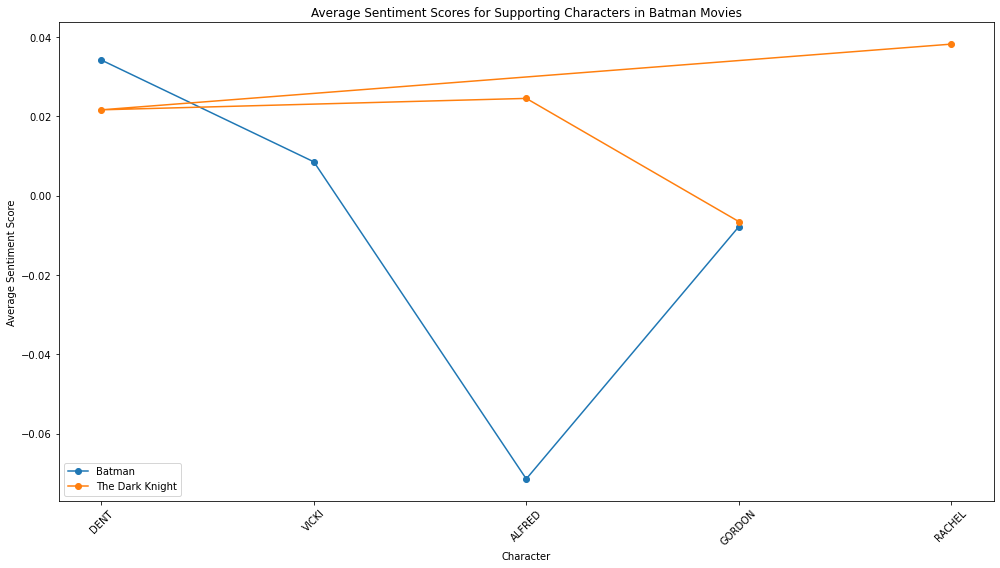

In [182]:
# Plotting sentiment scores for each supporting character in each movie (Line Plot)
plt.figure(figsize=(14, 8))
for movie in sentiment_data['Movie'].unique():
    subset = sentiment_data[sentiment_data['Movie'] == movie]
    plt.plot(subset['Character'], subset['Sentiment'], marker='o', label=movie)

plt.title('Average Sentiment Scores for Supporting Characters in Batman Movies')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# Create a pivot table for side-by-side bars
pivot_data = sentiment_data.pivot(index='Character', columns='Movie', values='Sentiment').fillna(0)

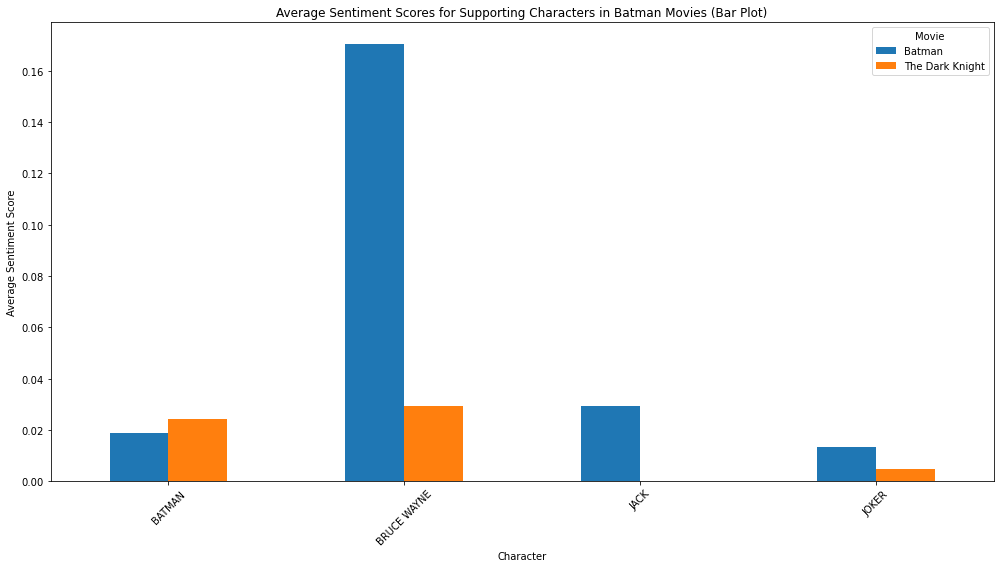

In [184]:
# Plotting sentiment scores for each supporting character in each movie (Bar Plot)
pivot_data.plot(kind='bar', figsize=(14, 8))
plt.title('Average Sentiment Scores for Supporting Characters in Batman Movies (Bar Plot)')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Movie')
plt.tight_layout()
plt.show()

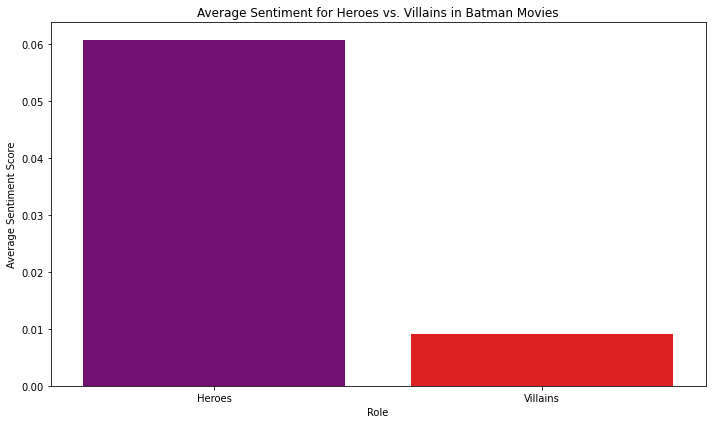

Average Sentiment Scores for Heroes and Villains:
Heroes: 0.06070988315247072
Villains: 0.009148378358752325


In [84]:
# Define heroes and villains
heroes = ['BATMAN', 'BRUCE WAYNE']
villains = ['JOKER']

# Calculate average sentiment for heroes and villains
hero_villain_sentiments = {'Heroes': [], 'Villains': []}

for movie, sentiments in combined_movie_sentiments.items():
    for character, score in sentiments.items():
        if character in heroes:
            hero_villain_sentiments['Heroes'].append(score)
        elif character in villains:
            hero_villain_sentiments['Villains'].append(score)

# Calculate average sentiment
average_hero_villain_sentiments = {role: sum(scores) / len(scores) if scores else 0 for role, scores in hero_villain_sentiments.items()}

# Define custom colors for heroes and villains
colors = ['purple', 'red']

# Plot average sentiment for heroes vs. villains
plt.figure(figsize=(10, 6))
sns.barplot(x=list(average_hero_villain_sentiments.keys()), y=list(average_hero_villain_sentiments.values()), palette=colors)
plt.title('Average Sentiment for Heroes vs. Villains in Batman Movies')
plt.xlabel('Role')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

# Display sentiment scores for verification
print("Average Sentiment Scores for Heroes and Villains:")
for role, score in average_hero_villain_sentiments.items():
    print(f"{role}: {score}")

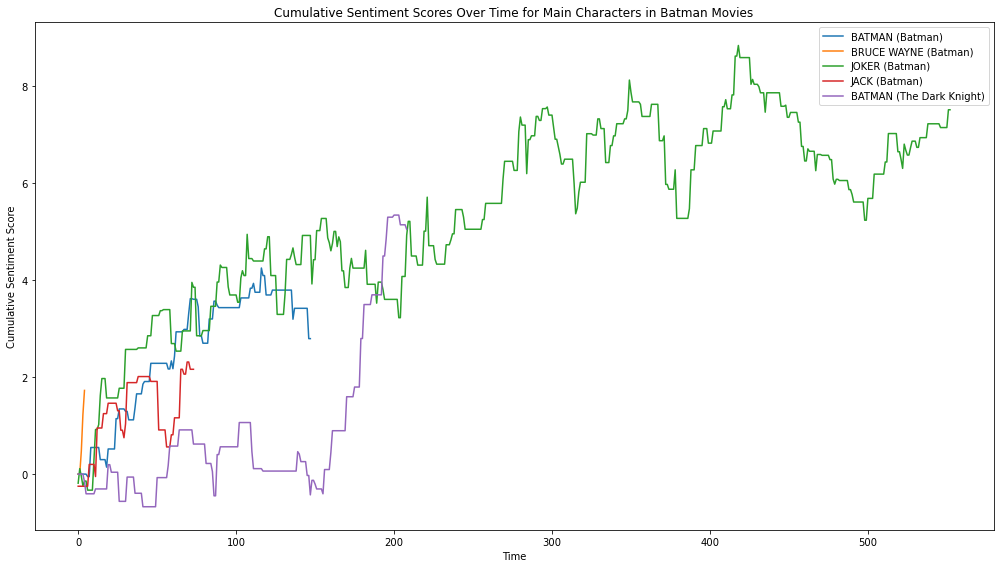

In [185]:
# Simulate sentiment over time data where time is the sequence of dialogues or scenes

# Function to simulate sentiment over time for characters
def simulate_sentiment_over_time(dialogues):
    sentiment_over_time = {}
    for character, lines in dialogues.items():
        sentiment_over_time[character] = []
        for line in lines:
            analysis = TextBlob(line)
            sentiment_over_time[character].append(analysis.sentiment.polarity)
    return sentiment_over_time

# Simulate sentiment over time for each movie
sentiment_over_time = {}
for movie, dialogues in movie_dialogues.items():
    sentiment_over_time[movie] = simulate_sentiment_over_time(dialogues)

# Plot sentiment over time for main characters in each movie
plt.figure(figsize=(14, 8))
for movie, sentiments in sentiment_over_time.items():
    for character in main_characters:
        if character in sentiments:
            plt.plot(np.cumsum(sentiments[character]), label=f'{character} ({movie})')

plt.title('Cumulative Sentiment Scores Over Time for Main Characters in Batman Movies')
plt.xlabel('Time')
plt.ylabel('Cumulative Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()

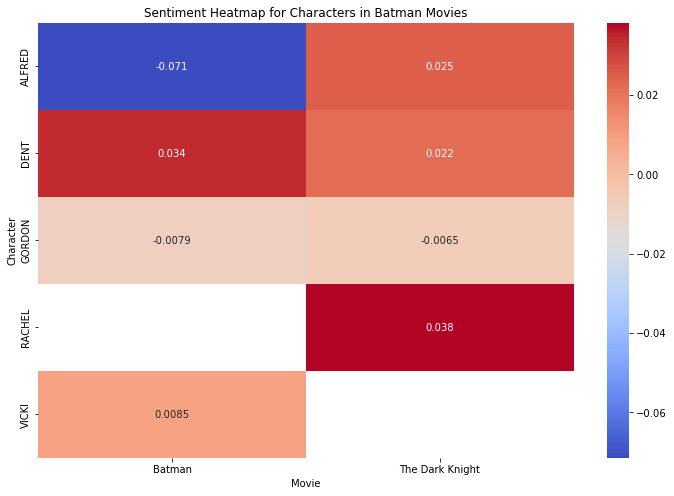

In [186]:
# Create a heatmap for sentiment scores of all characters
heatmap_data = sentiment_data.pivot('Character', 'Movie', 'Sentiment')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Sentiment Heatmap for Characters in Batman Movies')
plt.show()

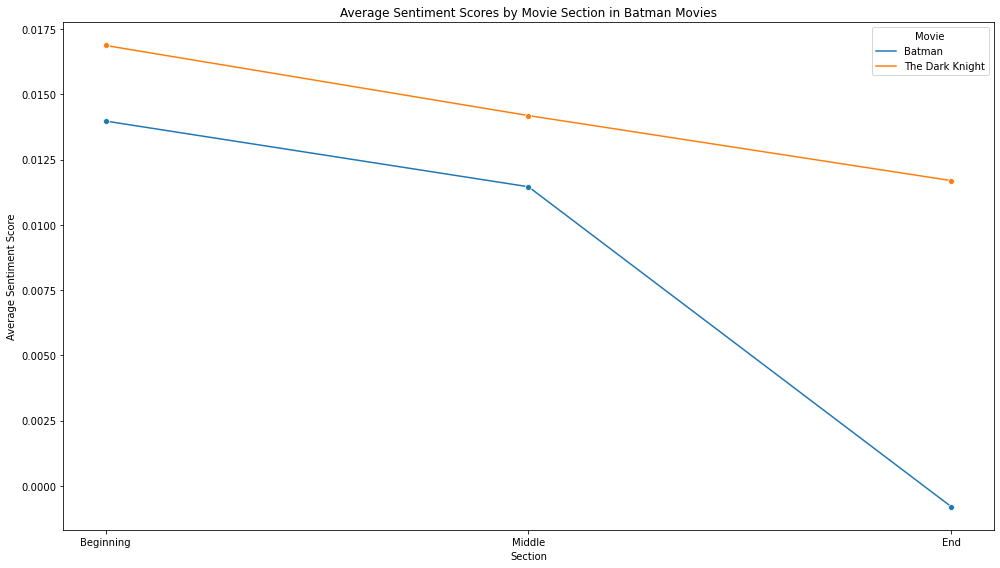

In [187]:
# Function to assign sections to dialogues
def assign_section(index, total_length):
    if index < total_length / 3:
        return 'Beginning'
    elif index < 2 * total_length / 3:
        return 'Middle'
    else:
        return 'End'

# Create a DataFrame to store sentiment by section
section_sentiment_data = []

for movie, dialogues in movie_dialogues.items():
    total_length = len(dialogues)
    for character, lines in dialogues.items():
        combined_character = combine_character_names(character)
        for i, line in enumerate(lines):
            analysis = TextBlob(line)
            section = assign_section(i, total_length)
            section_sentiment_data.append({
                'Movie': movie,
                'Character': combined_character,
                'Section': section,
                'Sentiment': analysis.sentiment.polarity
            })

section_sentiment_df = pd.DataFrame(section_sentiment_data)

# Set category order for sections
section_sentiment_df['Section'] = pd.Categorical(section_sentiment_df['Section'], categories=['Beginning', 'Middle', 'End'], ordered=True)

# Calculate average sentiment by section
section_avg_sentiment = section_sentiment_df.groupby(['Movie', 'Section'])['Sentiment'].mean().reset_index()

# Plot sentiment scores by section for each movie
plt.figure(figsize=(14, 8))
sns.lineplot(data=section_avg_sentiment, x='Section', y='Sentiment', hue='Movie', marker='o', palette='tab10')
plt.title('Average Sentiment Scores by Movie Section in Batman Movies')
plt.xlabel('Section')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

In [188]:
print(section_avg_sentiment)

             Movie    Section  Sentiment
0           Batman  Beginning   0.013977
1           Batman     Middle   0.011460
2           Batman        End  -0.000799
3  The Dark Knight  Beginning   0.016873
4  The Dark Knight     Middle   0.014187
5  The Dark Knight        End   0.011695


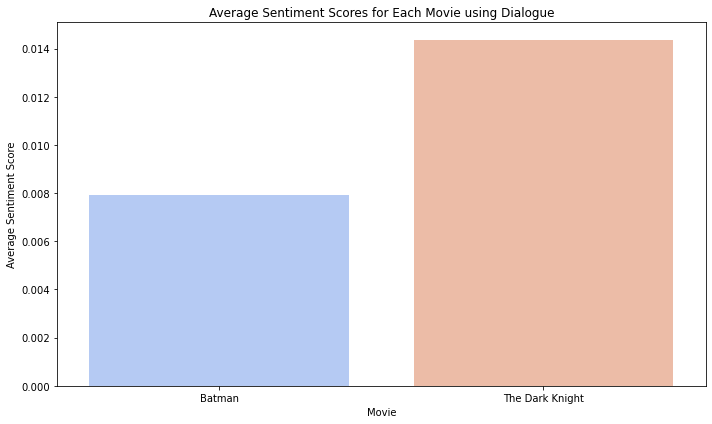

In [189]:
# Calculate average sentiment for each movie
average_movie_sentiments = section_sentiment_df.groupby('Movie')['Sentiment'].mean().reset_index()

# Plot average sentiment for each movie
plt.figure(figsize=(10, 6))
sns.barplot(x='Movie', y='Sentiment', data=average_movie_sentiments, palette='coolwarm')
plt.title('Average Sentiment Scores for Each Movie using Dialogue')
plt.xlabel('Movie')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()


In [190]:
# Function to calculate sentiment for each dialogue using VADER
def calculate_vader_sentiment(dialogues):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = {}
    for character, lines in dialogues.items():
        sentiment_scores[character] = []
        for line in lines:
            vs = analyzer.polarity_scores(line)
            sentiment_scores[character].append(vs['compound'])
    return sentiment_scores

In [191]:
# Calculate sentiment for each character in each movie using VADER
vader_movie_sentiments = {}
for movie in movie_dialogues:
    vader_movie_sentiments[movie] = calculate_vader_sentiment(movie_dialogues[movie])
    
# Function to calculate average sentiment scores
def average_sentiment(sentiment_scores):
    average_scores = {}
    for character, scores in sentiment_scores.items():
        if scores:  # Avoid division by zero
            average_scores[character] = sum(scores) / len(scores)
        else:
            average_scores[character] = 0
    return average_scores

In [192]:
# Calculate average sentiment for each character in each movie
average_vader_movie_sentiments = {movie: average_sentiment(sentiments) for movie, sentiments in vader_movie_sentiments.items()}

In [193]:
# Combine sentiment results
combined_vader_movie_sentiments = combine_character_results(average_vader_movie_sentiments, combined_characters)

In [194]:
# Prepare data for visualization (main characters only)
main_characters = ['BATMAN', 'BRUCE WAYNE', 'JOKER', 'JACK']

def prepare_sentiment_data(average_sentiments, characters_to_include):
    data = []
    for movie, sentiments in average_sentiments.items():
        for character, score in sentiments.items():
            if character in characters_to_include:
                data.append({'Movie': movie, 'Character': character, 'Sentiment': score})
    return pd.DataFrame(data)

vader_sentiment_data = prepare_sentiment_data(combined_vader_movie_sentiments, main_characters)

In [195]:
# Print sentiment scores for each main character
print("VADER Sentiment Scores for Main Characters:")
for index, row in vader_sentiment_data.iterrows():
    print(f"Movie: {row['Movie']}, Character: {row['Character']}, Sentiment Score: {row['Sentiment']}")

VADER Sentiment Scores for Main Characters:
Movie: Batman, Character: BATMAN, Sentiment Score: 0.0592945945945946
Movie: Batman, Character: JACK, Sentiment Score: 0.019550000000000005
Movie: Batman, Character: BRUCE WAYNE, Sentiment Score: 0.08682261072261073
Movie: Batman, Character: JOKER, Sentiment Score: 0.030741591320072332
Movie: The Dark Knight, Character: JOKER, Sentiment Score: 0.013433518518518532
Movie: The Dark Knight, Character: BATMAN, Sentiment Score: -0.030332535885167457
Movie: The Dark Knight, Character: BRUCE WAYNE, Sentiment Score: 0.018430769230769226


In [196]:
# Create a pivot table for side-by-side bars
vader_pivot_data = vader_sentiment_data.pivot(index='Character', columns='Movie', values='Sentiment').fillna(0)

<Figure size 1008x576 with 0 Axes>

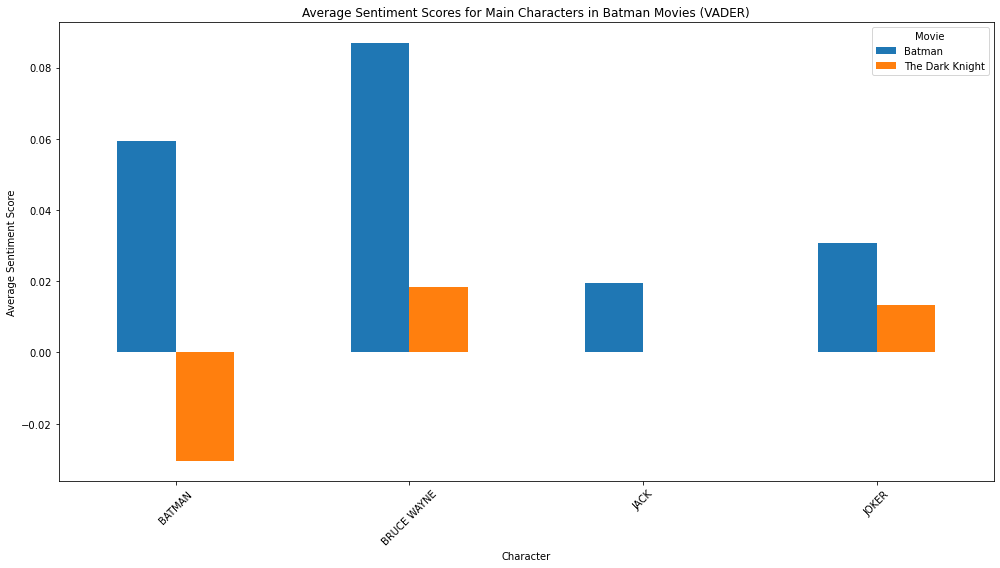

In [198]:
# Plotting VADER sentiment scores for each character in each movie (Bar Plot)
plt.figure(figsize=(14, 8))
vader_pivot_data.plot(kind='bar', figsize=(14, 8))
plt.title('Average Sentiment Scores for Main Characters in Batman Movies (VADER)')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Movie')
plt.tight_layout()
plt.show()

In [199]:
# Provided sentiment scores for TextBlob and VADER for Batman/Bruce Wayne and Joker
data = {
    'Movie': ['Batman', 'Batman', 'Batman', 'Batman', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight',
              'Batman', 'Batman', 'Batman', 'Batman', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight'],
    'Character': ['BATMAN', 'JACK', 'BRUCE WAYNE', 'JOKER', 'JOKER', 'BATMAN', 'BRUCE WAYNE',
                  'BATMAN', 'JACK', 'BRUCE WAYNE', 'JOKER', 'JOKER', 'BATMAN', 'BRUCE WAYNE'],
    'Sentiment_Score': [0.018861808236808237, 0.029191066066066064, 0.17031196189850037, 0.013576064344034498, 0.004720692373470152, 
                        0.024136765237243705, 0.02952899723733057, 0.0592945945945946, 0.019550000000000005, 0.08682261072261073, 
                        0.030741591320072332, 0.013433518518518532, -0.030332535885167457, 0.018430769230769226],
    'Model': ['TextBlob', 'TextBlob', 'TextBlob', 'TextBlob', 'TextBlob', 'TextBlob', 'TextBlob',
              'VADER', 'VADER', 'VADER', 'VADER', 'VADER', 'VADER', 'VADER']
}

# Create DataFrame
sentiment_df = pd.DataFrame(data)
print(sentiment_df)

              Movie    Character  Sentiment_Score     Model
0            Batman       BATMAN         0.018862  TextBlob
1            Batman         JACK         0.029191  TextBlob
2            Batman  BRUCE WAYNE         0.170312  TextBlob
3            Batman        JOKER         0.013576  TextBlob
4   The Dark Knight        JOKER         0.004721  TextBlob
5   The Dark Knight       BATMAN         0.024137  TextBlob
6   The Dark Knight  BRUCE WAYNE         0.029529  TextBlob
7            Batman       BATMAN         0.059295     VADER
8            Batman         JACK         0.019550     VADER
9            Batman  BRUCE WAYNE         0.086823     VADER
10           Batman        JOKER         0.030742     VADER
11  The Dark Knight        JOKER         0.013434     VADER
12  The Dark Knight       BATMAN        -0.030333     VADER
13  The Dark Knight  BRUCE WAYNE         0.018431     VADER


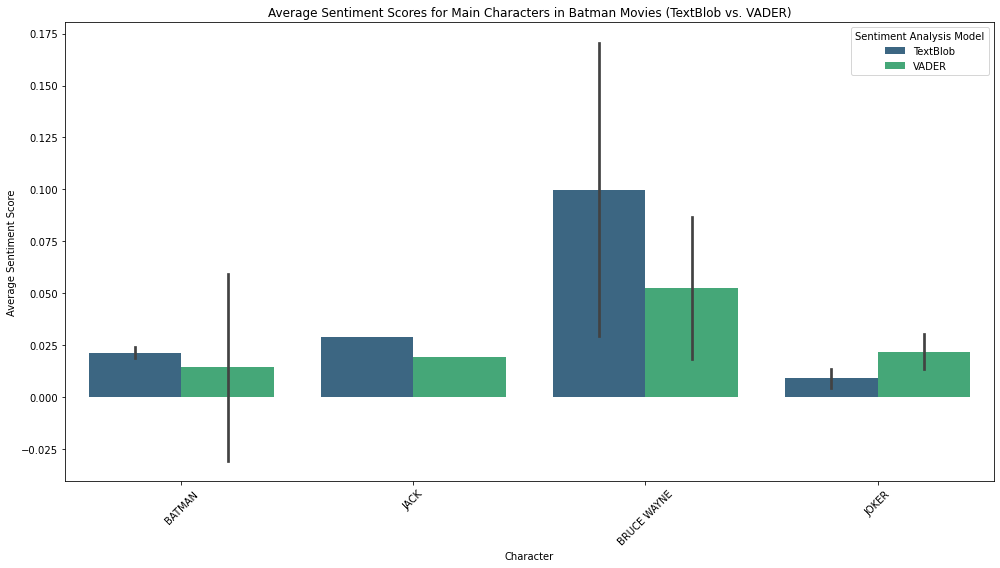

In [200]:
# Plotting combined sentiment scores comparison
plt.figure(figsize=(14, 8))
sns.barplot(data=sentiment_df, x='Character', y='Sentiment_Score', hue='Model', palette='viridis')
plt.title('Average Sentiment Scores for Main Characters in Batman Movies (TextBlob vs. VADER)')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Analysis Model')
plt.tight_layout()
plt.show()

Interpretation and Comparison of Sentiment Analysis Results

TextBlob Sentiment Scores for Main Characters:
Batman:
BATMAN: 0.0189 (neutral sentiment)
JACK: 0.0292 (neutral to slightly positive sentiment)
BRUCE WAYNE: 0.1703 (positive sentiment)
JOKER: 0.0136 (neutral sentiment)

The Dark Knight:
JOKER: 0.0047 (neutral sentiment)
BATMAN: 0.0241 (neutral to slightly positive sentiment)
BRUCE WAYNE: 0.0295 (neutral to slightly positive sentiment)


VADER Sentiment Scores for Main Characters:
Batman:
BATMAN: 0.0593 (positive sentiment)
JACK: 0.0196 (neutral sentiment)
BRUCE WAYNE: 0.0868 (positive sentiment)
JOKER: 0.0307 (neutral sentiment)

The Dark Knight:
JOKER: 0.0134 (neutral sentiment)
BATMAN: -0.0303 (slightly negative sentiment)
BRUCE WAYNE: 0.0184 (neutral sentiment)

Comparison:
TextBlob:
TextBlob shows that Bruce Wayne in "Batman" has the highest positive sentiment score (0.1703), indicating a more positive tone in his dialogues.
The Joker has neutral sentiment scores in both movies, with slightly positive scores but generally close to neutral.
Batman has neutral to slightly positive sentiment scores in both movies, indicating a balanced tone in his dialogues.

VADER:
VADER also shows Bruce Wayne in "Batman" with a positive sentiment score (0.0868), but lower than TextBlob's score.
The Joker has neutral sentiment scores in both movies, similar to TextBlob.
Interestingly, VADER indicates that Batman has a slightly negative sentiment score (-0.0303) in "The Dark Knight," contrasting with TextBlob's slightly positive score.